In [1]:
import keras
from keras.layers import SimpleRNN as RNN
import os
import fnmatch
from scipy.io import wavfile
import scipy
import sklearn.preprocessing as preprocessing
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import numpy as np
import scipy.fftpack as fft
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


['./110dist.wav', './110pure.wav', './146dist.wav', './146pure.wav', './196dist.wav', './196pure.wav', './247dist.wav', './247pure.wav', './330dist.wav', './330pure.wav', './82+123dist.wav', './82+123pure.wav', './82dist.wav', './82pure.wav', './Guitar-C3dist.wav', './Guitar-C3pure.wav', './cleanchord-A-predict.wav', './cleanchord-A-test.wav', './result-146.wav', './result-82+123.wav', './result-cleanchord-A.wav', './result-guitarC3.wav']


/home/flavio/.local/share/virtualenvs/fft2-ovvuOOB2/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


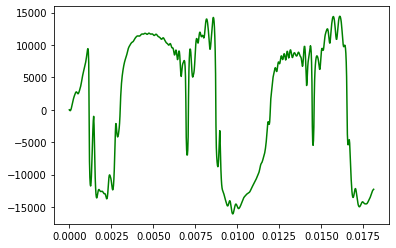

-12


In [2]:
def recursive_files():
    matches = []
    for root, dirnames, filenames in os.walk('./'):
        for filename in fnmatch.filter(filenames, '*.wav'):
            matches.append(os.path.join(root, filename))
    return matches
    # wavfile.read('')

all_waves = list()

files = recursive_files()
files = sorted(files)
print(files)

for file in files:
    name = file.split('/')[-1]
    fs, signal =  wavfile.read(name)
    secs = signal.shape[0] / float(fs)
    Ts = 1.0/fs
    t = scipy.arange(0,secs,Ts)
    try: 
        if("test" in name ):
            train = list(signal)
        if("predict" in name):
            test = list(signal)
        insert = [name, list(signal[0:2205])]
        all_waves.append(insert)
    except IndexError:
        print(IndexError)
        continue

hX = []
hy = []
X = []
y = []

for line in all_waves:
    if("pure" in line[0]):
        hX.append(line[0])
        for steps in range(len(line[1])-9):
            d = steps + 10
            X.append(line[1][steps:d])
    elif("dist" in line[0]):
        hy.append(line[0])
        y.append(line[1])
    else:
        y_test = line[1]


# for i in range(len(X)):
X = preprocessing.maxabs_scale(X)
# for i in range(len(y)):
y = preprocessing.maxabs_scale(y)

w330test = preprocessing.maxabs_scale(test[0:-9])
train = preprocessing.maxabs_scale(train)

X_train = []
for i in range(len(train)-9):
    d= i + 10
    X_train.append(train[i:d])


p1 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),all_waves[14][1][0:800], "g")
# p2 = plt.plot(scipy.arange(0,(1/44100*800),1/44100),y[0], "r")
plt.show()
print(all_waves[14][1][0])

In [3]:
X = np.array(X)
X = np.reshape(X,(X.shape[0], 1, X.shape[1]))
print(X.shape)


X_train = np.array(X_train)
X_train = np.reshape(X_train,(X_train.shape[0], 1, X_train.shape[1]))
print(X_train.shape)

(17568, 1, 10)
(198899, 1, 10)


In [4]:
Y = []
for i in y:
    for j in range(len(i)-9):
        Y.append(i[j])

In [6]:
print(w330test.shape)

Y = np.array(Y)
Y.shape

(198899,)


(17568,)

In [69]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1, 10), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1376      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 1,649
Trainable params: 1,649
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X,Y, epochs=40, batch_size=16, verbose=2)

predicted = model.predict(np.array(X_train))

Epoch 1/40
 - 1s - loss: 7.6436e-04
Epoch 2/40
 - 1s - loss: 7.5634e-04
Epoch 3/40
 - 1s - loss: 7.5191e-04
Epoch 4/40
 - 1s - loss: 7.4015e-04
Epoch 5/40
 - 1s - loss: 7.4762e-04
Epoch 6/40
 - 1s - loss: 7.3759e-04
Epoch 7/40
 - 1s - loss: 7.3496e-04
Epoch 8/40
 - 1s - loss: 7.2169e-04
Epoch 9/40
 - 1s - loss: 7.1984e-04
Epoch 10/40
 - 1s - loss: 7.1442e-04
Epoch 11/40
 - 1s - loss: 7.1939e-04
Epoch 12/40
 - 1s - loss: 7.1242e-04
Epoch 13/40
 - 1s - loss: 7.1176e-04
Epoch 14/40
 - 1s - loss: 7.1080e-04
Epoch 15/40
 - 1s - loss: 7.0424e-04
Epoch 16/40
 - 1s - loss: 6.9856e-04
Epoch 17/40
 - 1s - loss: 6.9393e-04
Epoch 18/40
 - 1s - loss: 6.9690e-04
Epoch 19/40
 - 1s - loss: 6.8622e-04
Epoch 20/40
 - 1s - loss: 6.9991e-04
Epoch 21/40
 - 1s - loss: 6.8338e-04
Epoch 22/40
 - 1s - loss: 6.8611e-04
Epoch 23/40
 - 1s - loss: 6.7771e-04
Epoch 24/40
 - 1s - loss: 6.8187e-04
Epoch 25/40
 - 1s - loss: 6.7761e-04
Epoch 26/40
 - 1s - loss: 6.7689e-04
Epoch 27/40
 - 1s - loss: 6.7643e-04
Epoch 28/4

In [72]:
trainScore = model.evaluate(X_train, w330test, verbose=0)
print(trainScore)

0.0007065553537176265


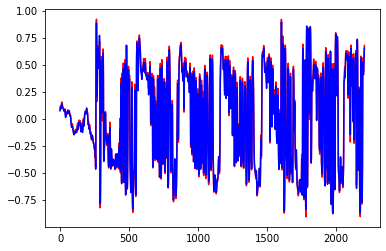

[0.08178513 0.09973078 0.11050279 ... 0.0254491  0.02627961 0.02743486]


In [73]:
predicted = predicted[:,0]
plt.plot(predicted[0:2205], c='r')
plt.plot(w330test[0:2205], c='b')
plt.show()
print(predicted)

In [74]:
FFT = abs(scipy.fft(predicted[0:44100]))
FFT = preprocessing.maxabs_scale(FFT)
FFT_side = FFT[:1000]
freqs = fft.fftfreq(predicted[0:44100].size, 1/44100)
fft_freqs = np.array(freqs)
freqs_side = freqs[:1000]
fft_freqs_side = np.array(freqs_side)
FFT1 = abs(scipy.fft(w330test[0:44100]))
FFT1 = preprocessing.maxabs_scale(FFT1)
FFT_side1 = FFT1[:1000]
freqs1 = fft.fftfreq(w330test[0:44100].size, 1/44100)
fft_freqs1 = np.array(freqs1)
freqs_side1 = freqs1[:1000]
fft_freqs_side1 = np.array(freqs_side1)

print(mean_squared_error(FFT1,FFT))

1.72388763877046e-06


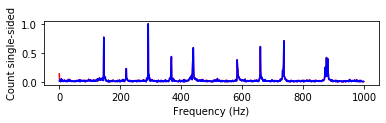

In [75]:
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "r")
p4 = plt.plot(freqs_side1, abs(FFT_side1), "b")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

In [78]:
print(predicted)
print(w330test)

wavfile.write("../result-cleanchord-A.wav",44100,predicted)

[0.08178513 0.09973078 0.11050279 ... 0.0254491  0.02627961 0.02743486]
[0.07636227 0.09396015 0.10143926 ... 0.01483251 0.0162152  0.01703224]
